In [22]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [23]:
from fastbook import *
from fastai.vision.widgets import *


In [24]:
ims = search_images_ddg('grizzly bear')
len(ims)

200

In [25]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [26]:
dest= 'images/grizzly.jpg'
download_url(ims[0],dest,show_progress=False)

Path('images/grizzly.jpg')

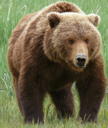

In [27]:
im = Image.open(dest)
im.to_thumb(128,128)

In [28]:
bear_types='grizzly', 'black', 'teddy'
path=Path('bears')


In [29]:
searches='teddy','grizzly','black'
path=Path('bears')

for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
    
        download_images(dest, urls=search_images_ddg( f'{o} bear'))

In [30]:
fns = get_image_files(path)
fns

(#1586) [Path('bears/black/6199ed9f-4313-4c4c-9896-997bf37d2613.jpg'),Path('bears/black/332ee348-90af-4360-a0c3-4096dede1773.jpg'),Path('bears/black/8dfdd7da-786d-48bd-8d53-899d94ea26cc.jpg'),Path('bears/black/355fbab6-6459-4cf5-a8e4-5078d1dc4427.jpg'),Path('bears/black/742fa47e-0e36-4f65-ba46-560301679ef0.jpg'),Path('bears/black/b3bb022c-032c-4f8b-be6f-f7d4c04550e2.jpg'),Path('bears/black/a6bbefcc-4983-4f63-ac14-c9a6b4956000.jpg'),Path('bears/black/f1133fa3-043a-4835-8240-f350b5fa3d45.jpg'),Path('bears/black/459d9bb6-602b-43c0-8a63-6b7e27627342.png'),Path('bears/black/f15d0ef8-f744-4e97-bef8-6ba32933951e.jpg')...]

In [ ]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

In [ ]:
bears=DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label,
    item_tfms=[Resize(128)]
)

In [ ]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [ ]:
learn = vision_learner(dls, resnet18, metrics= error_rate)
learn.fine_tune(3)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('bears/teddy/0b9ae46e-91b1-42fa-a63d-72a2b2f1e5b8.jpg')